In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_df = pd.read_csv("data/dataset.csv")

# Columns that in the Data

In [8]:
list(data_df.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

# Checking for Missing Values and DataTypes of each Columns

In [9]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
data_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data is balanced

In [11]:
data_df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

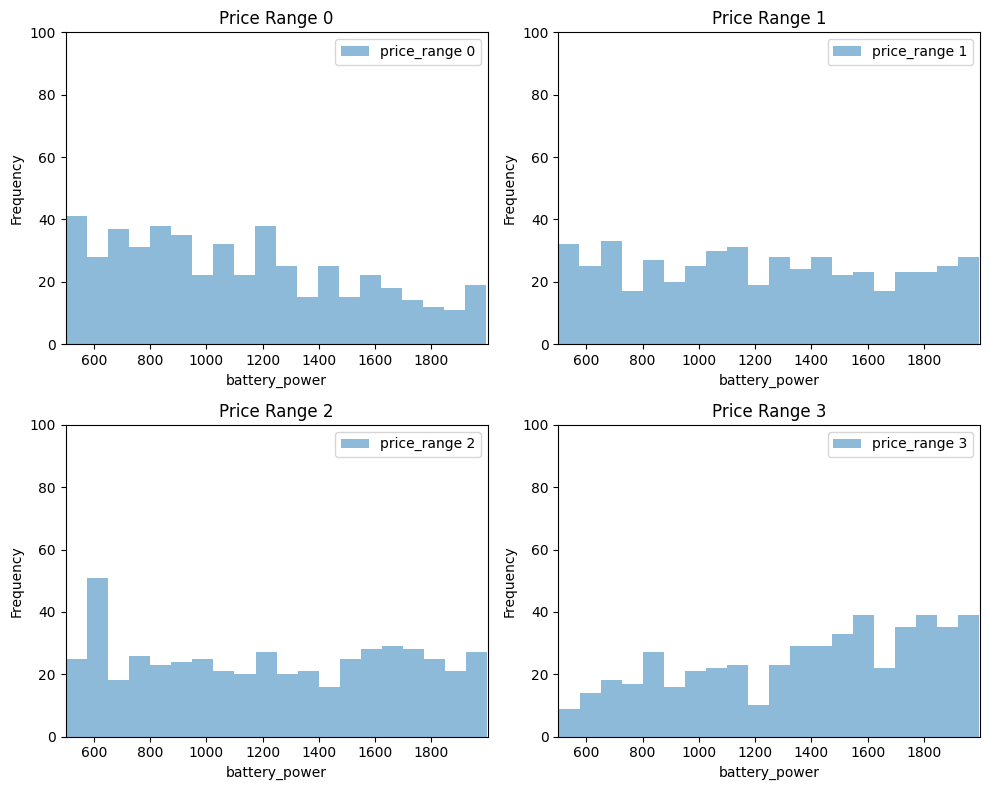

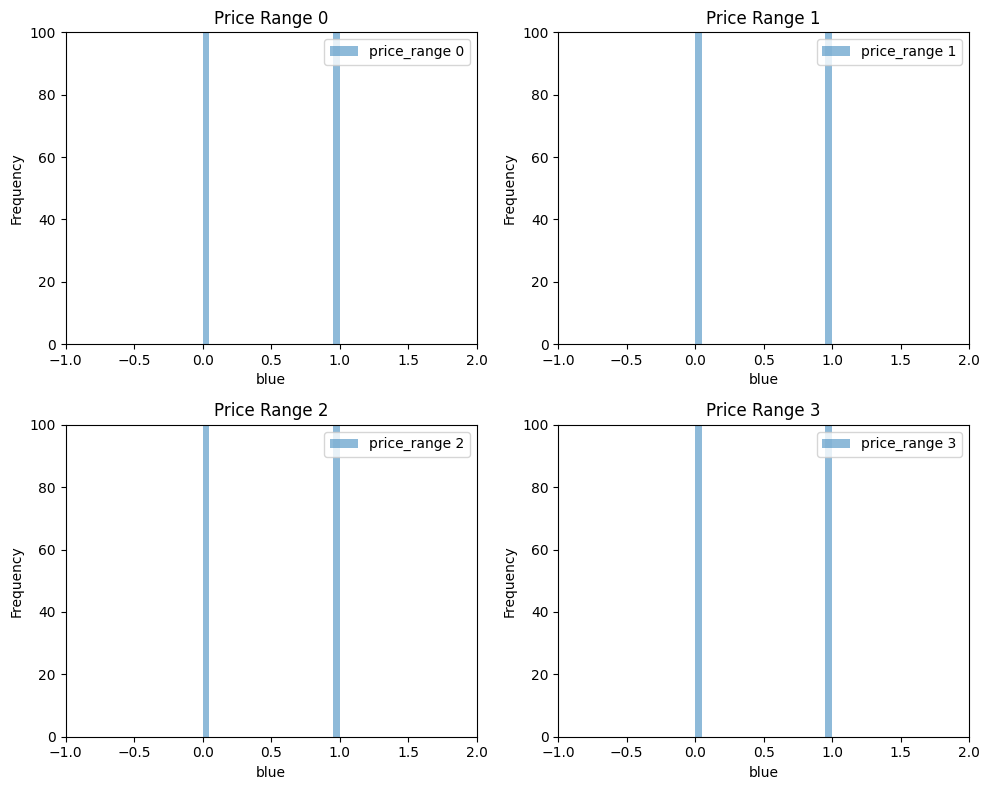

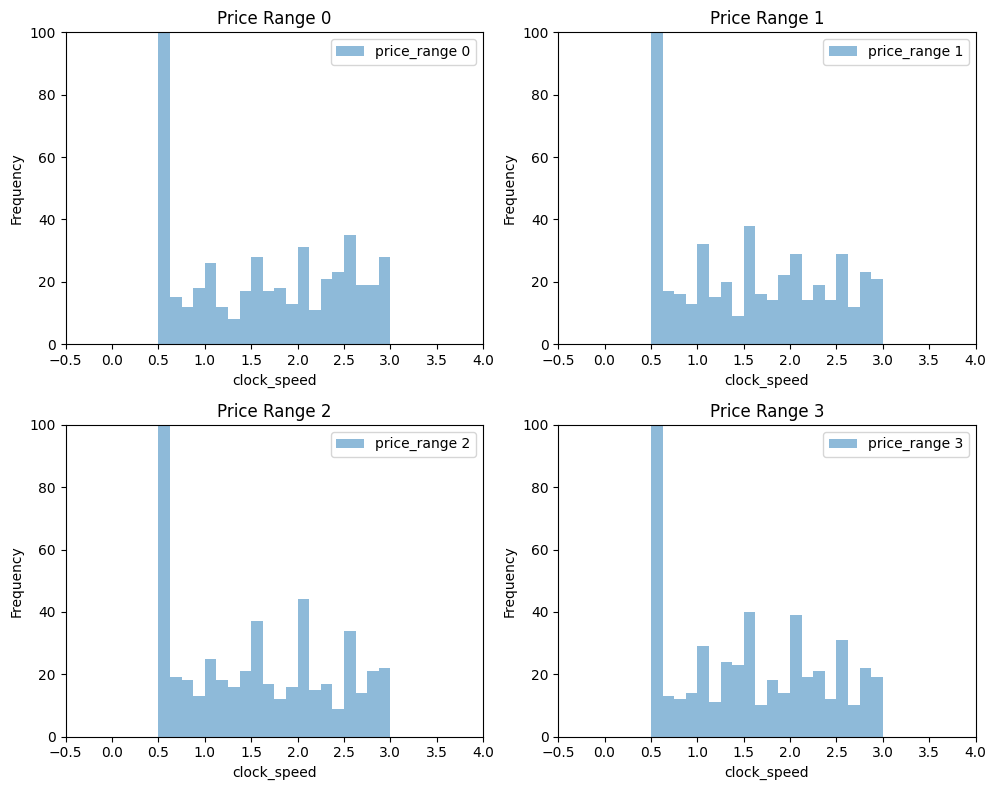

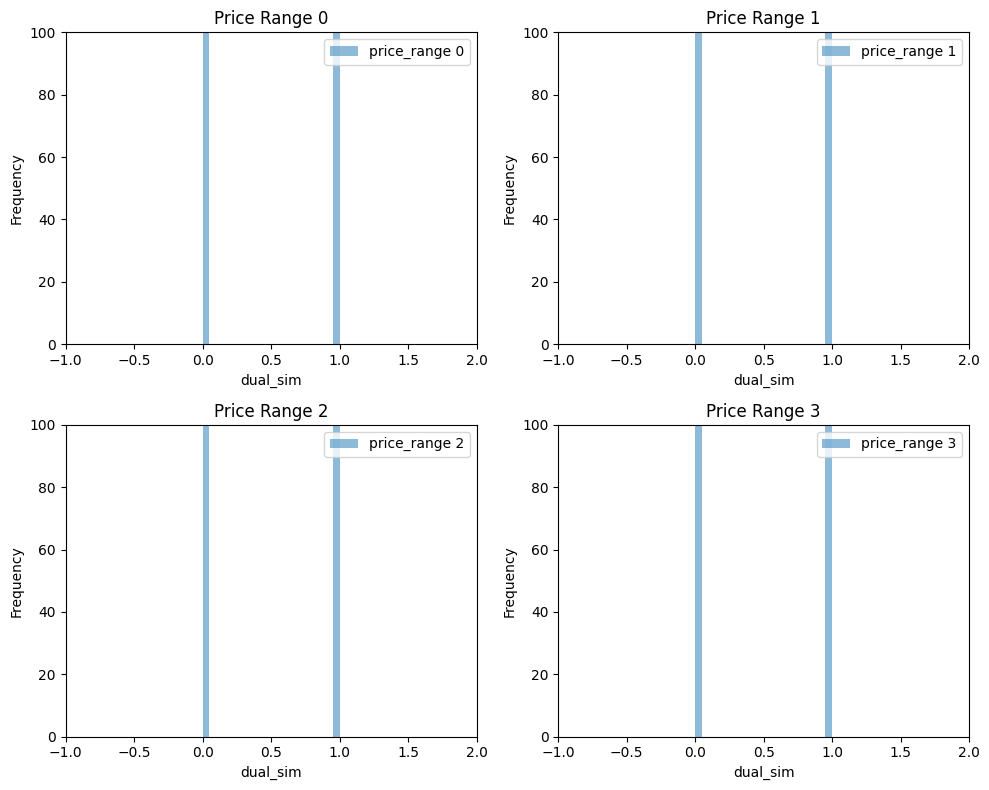

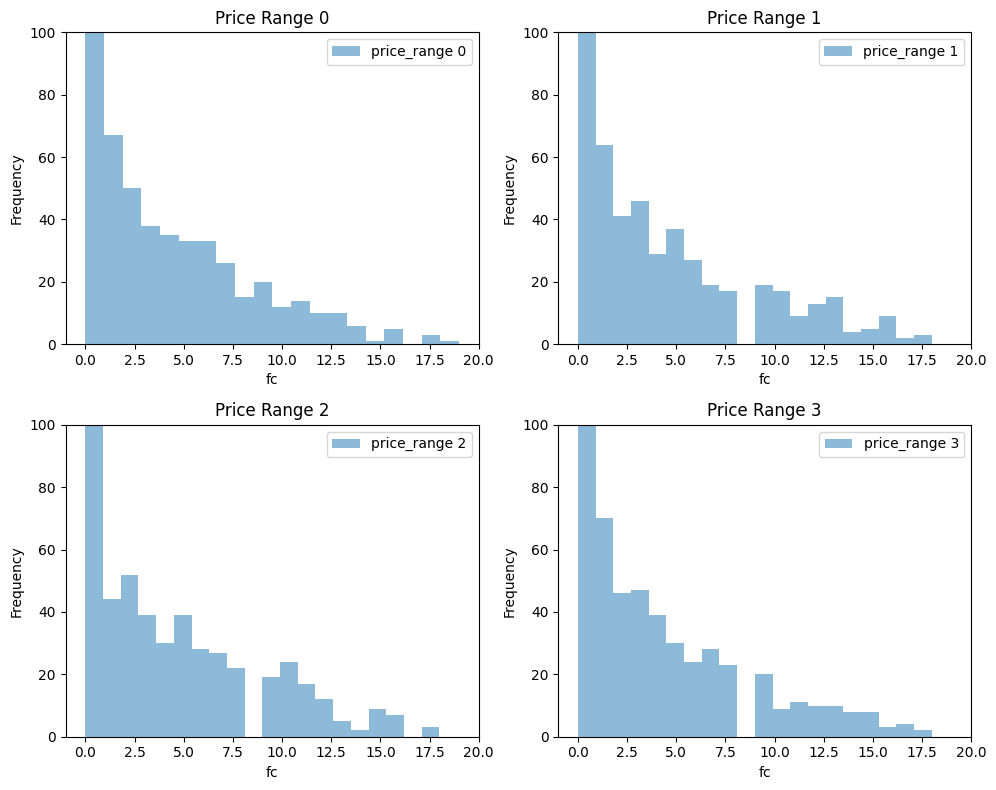

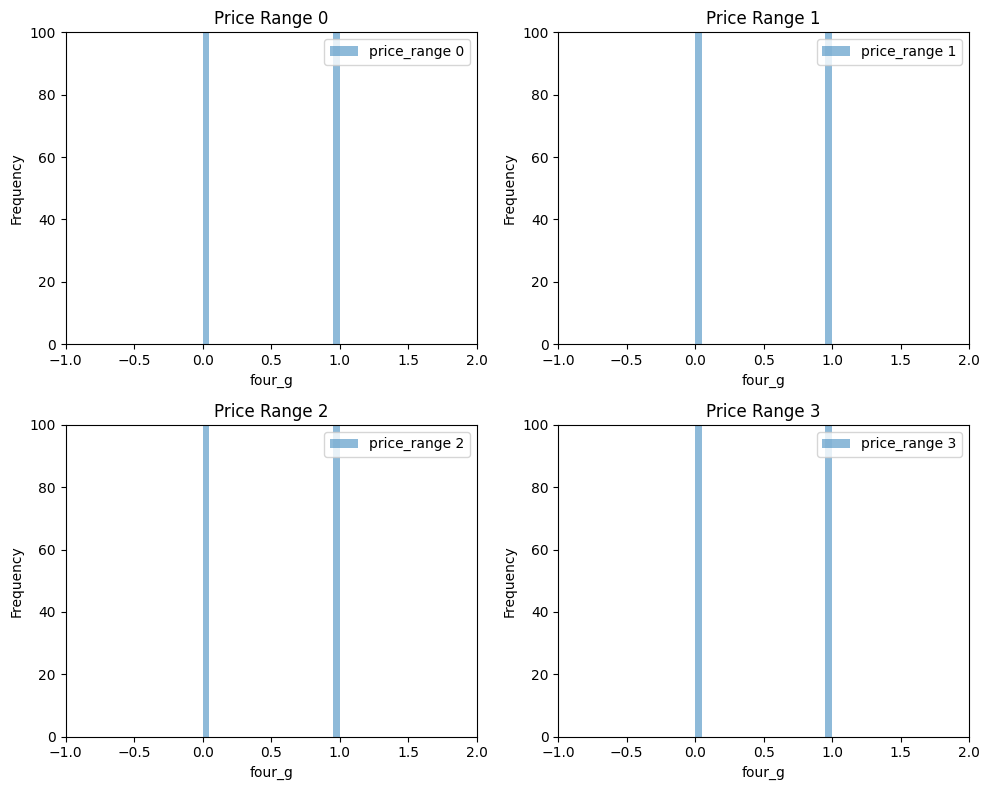

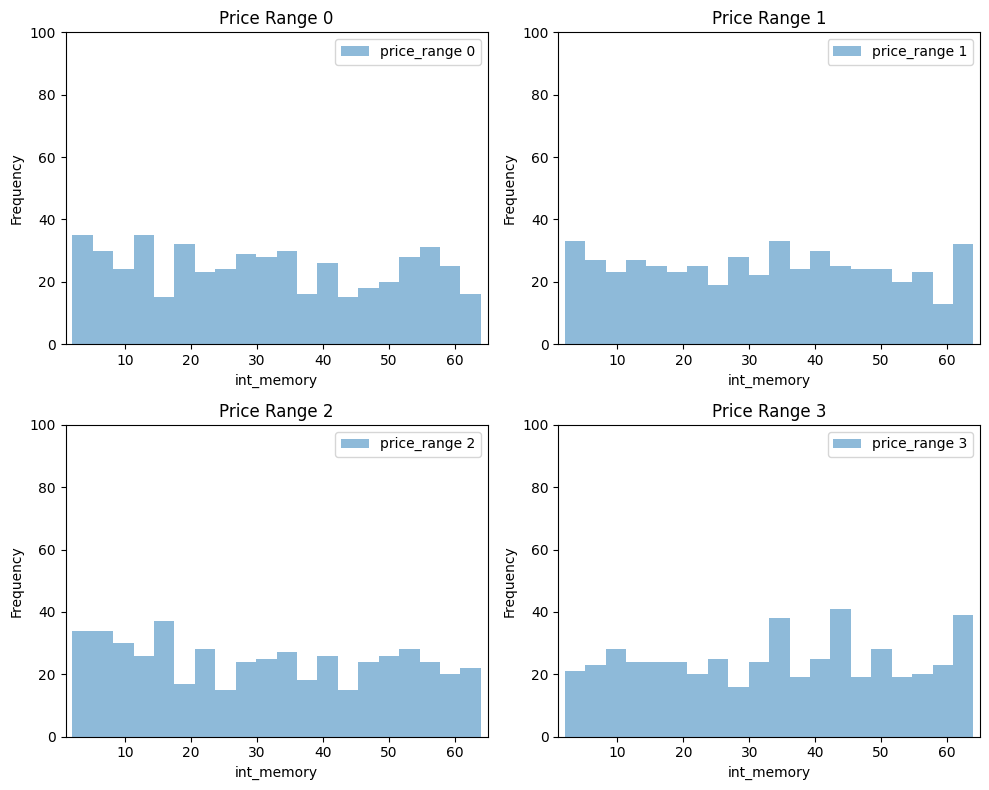

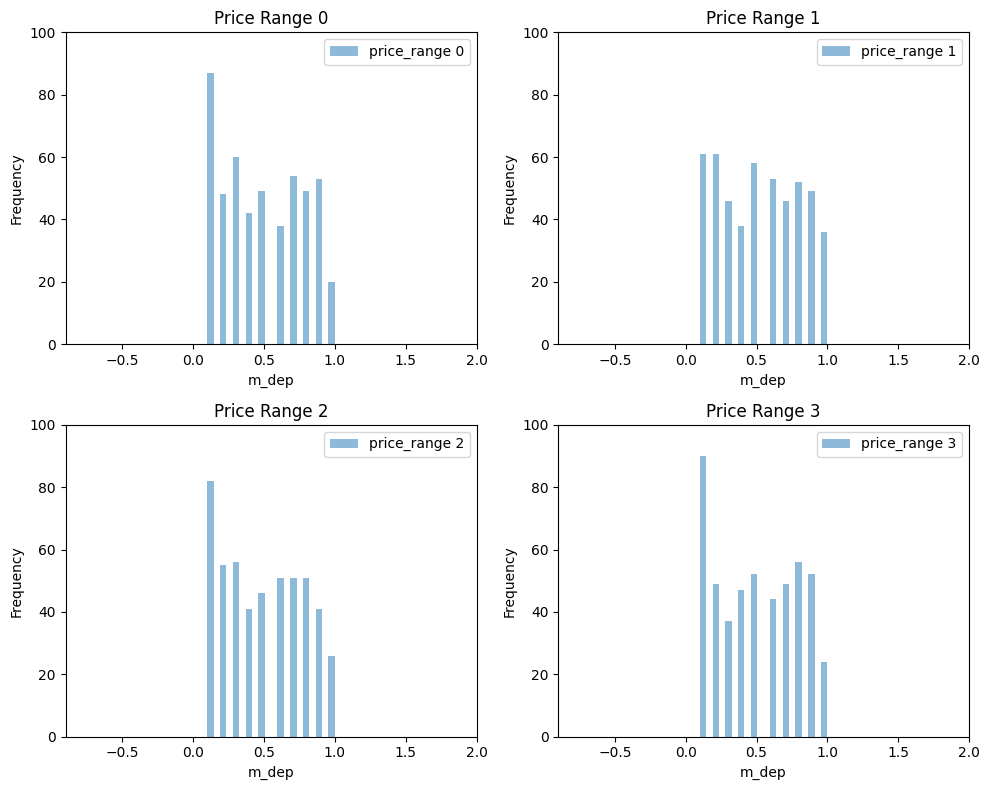

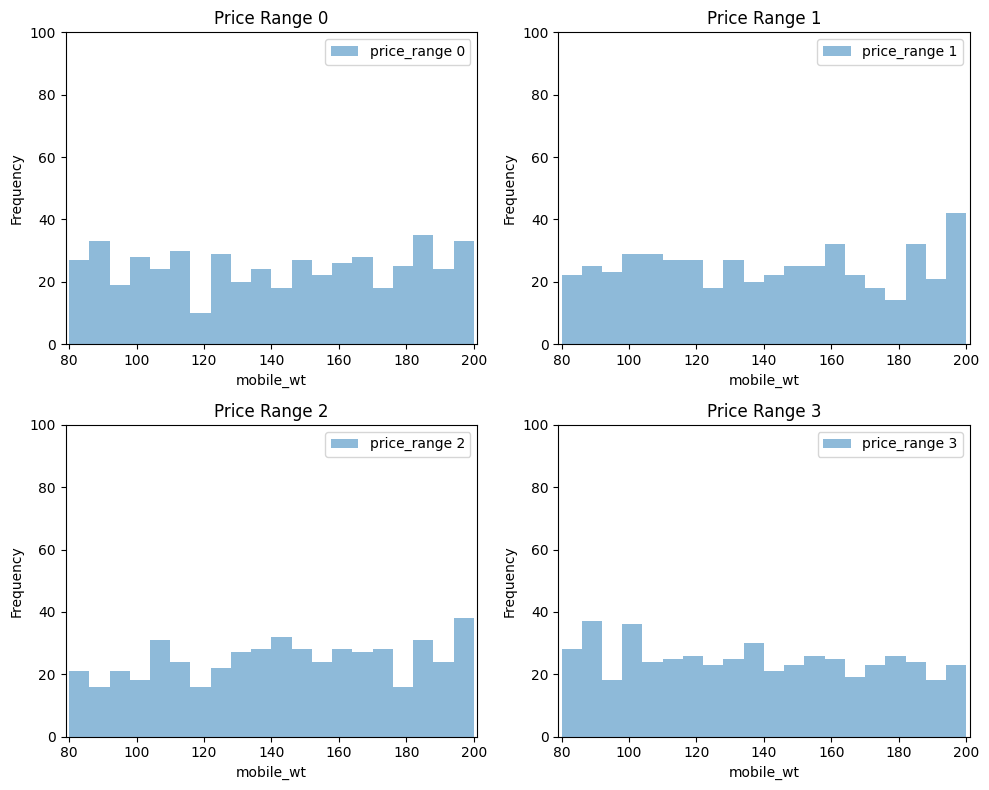

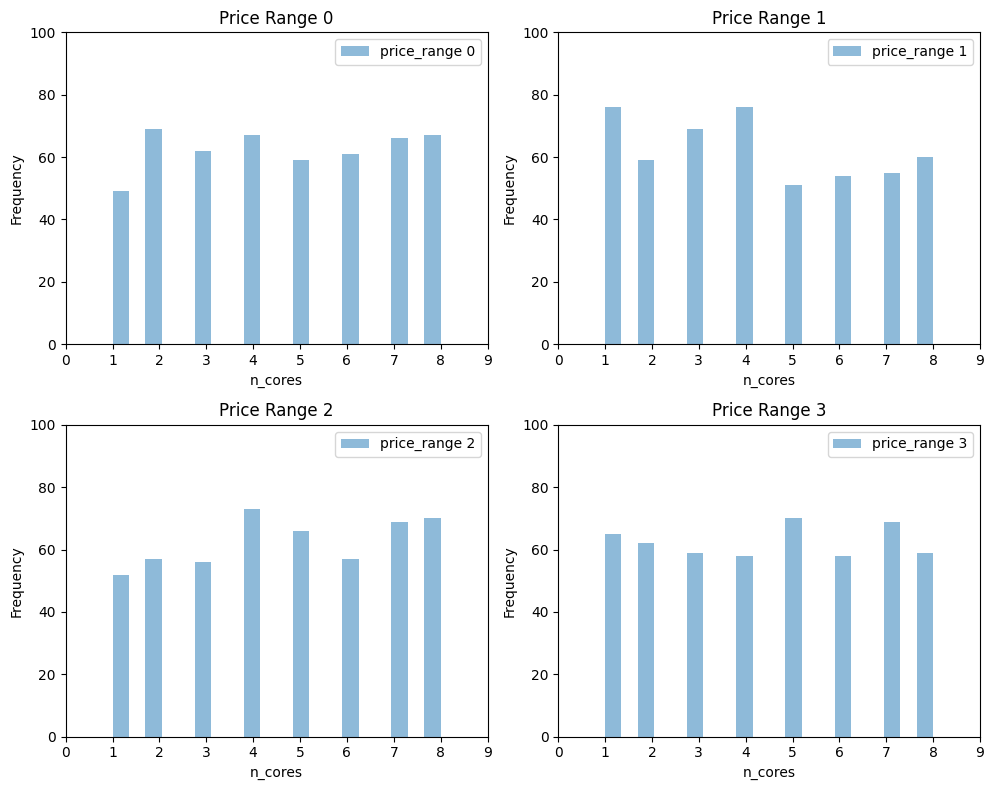

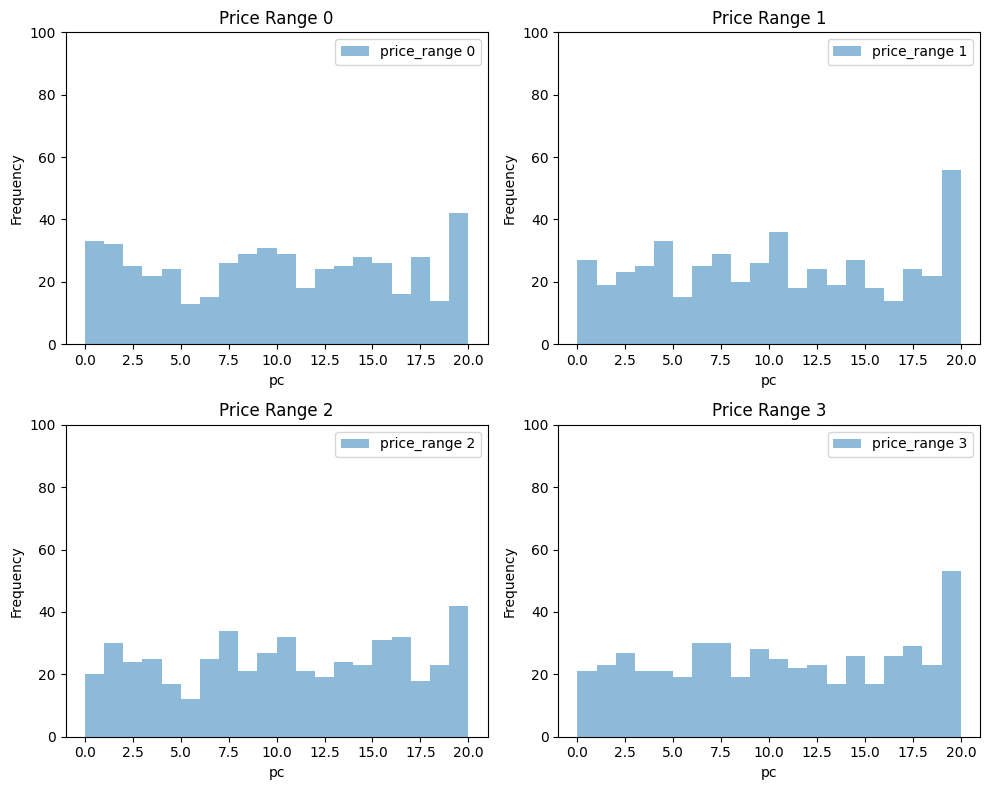

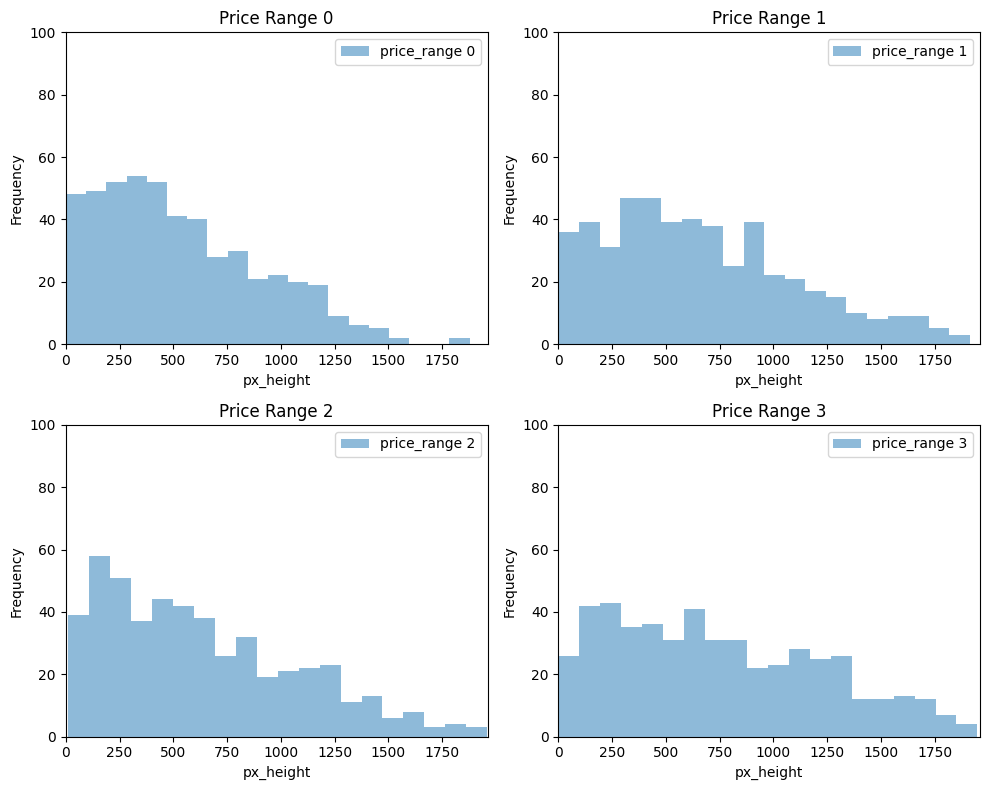

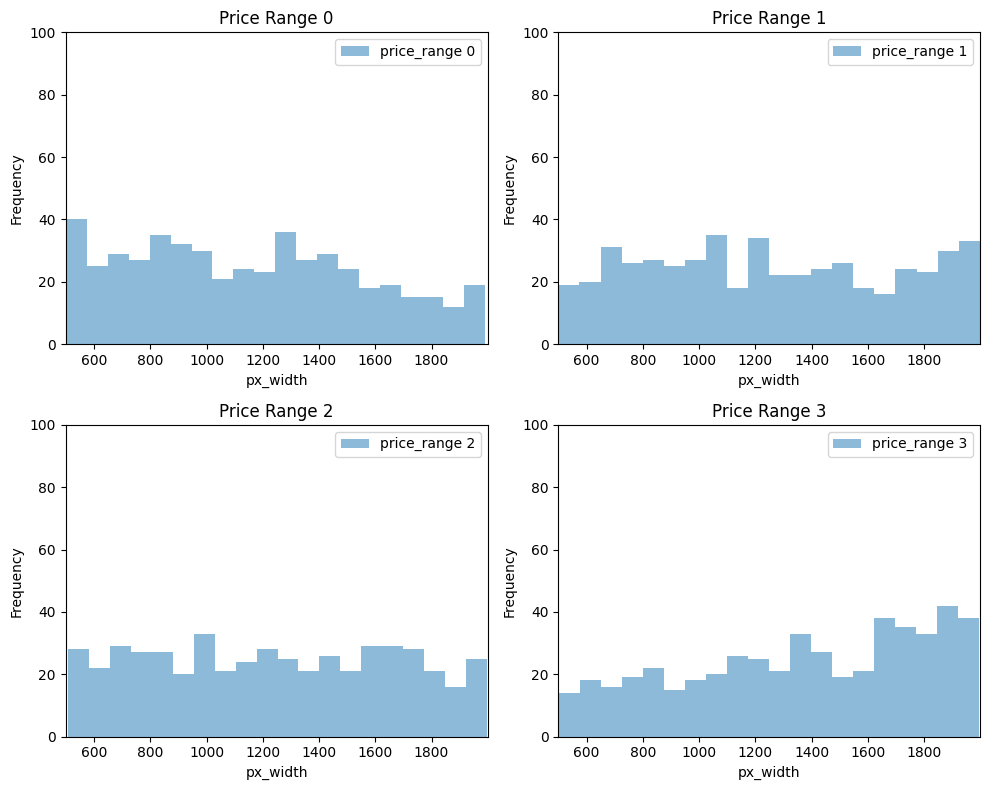

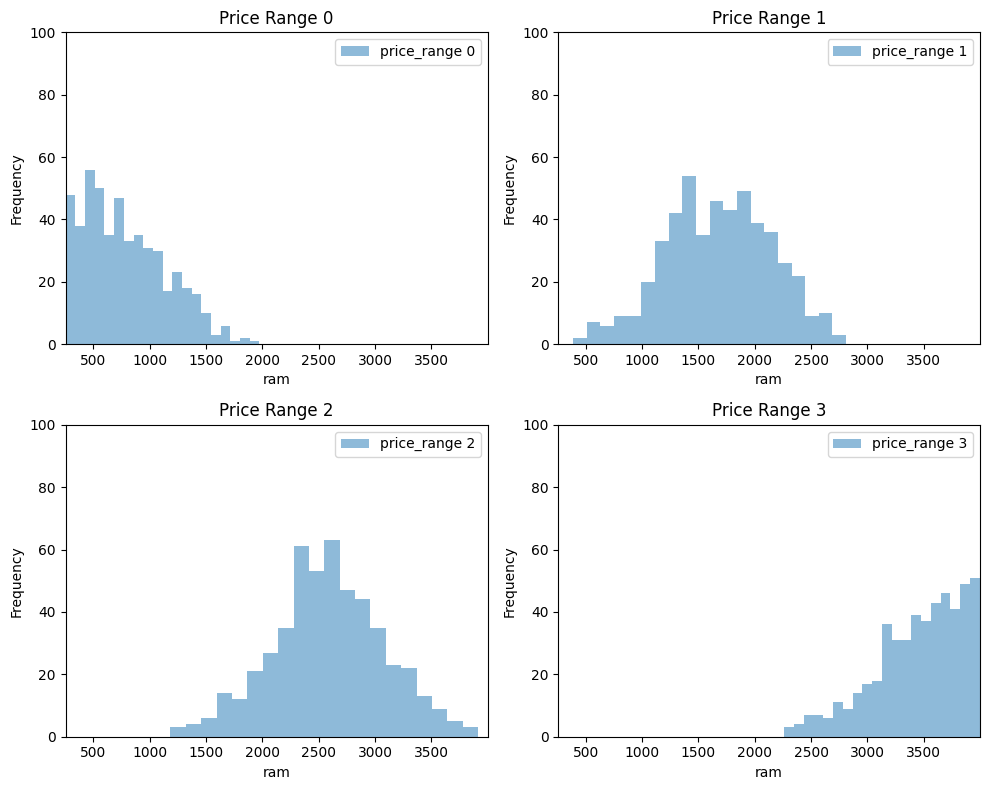

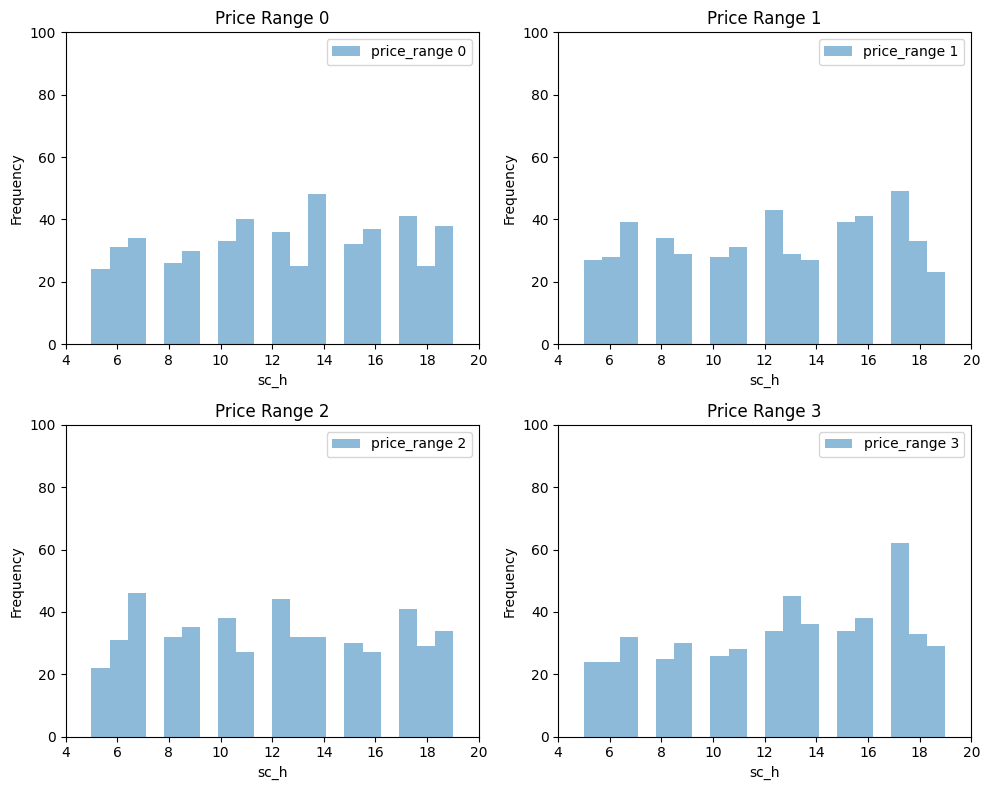

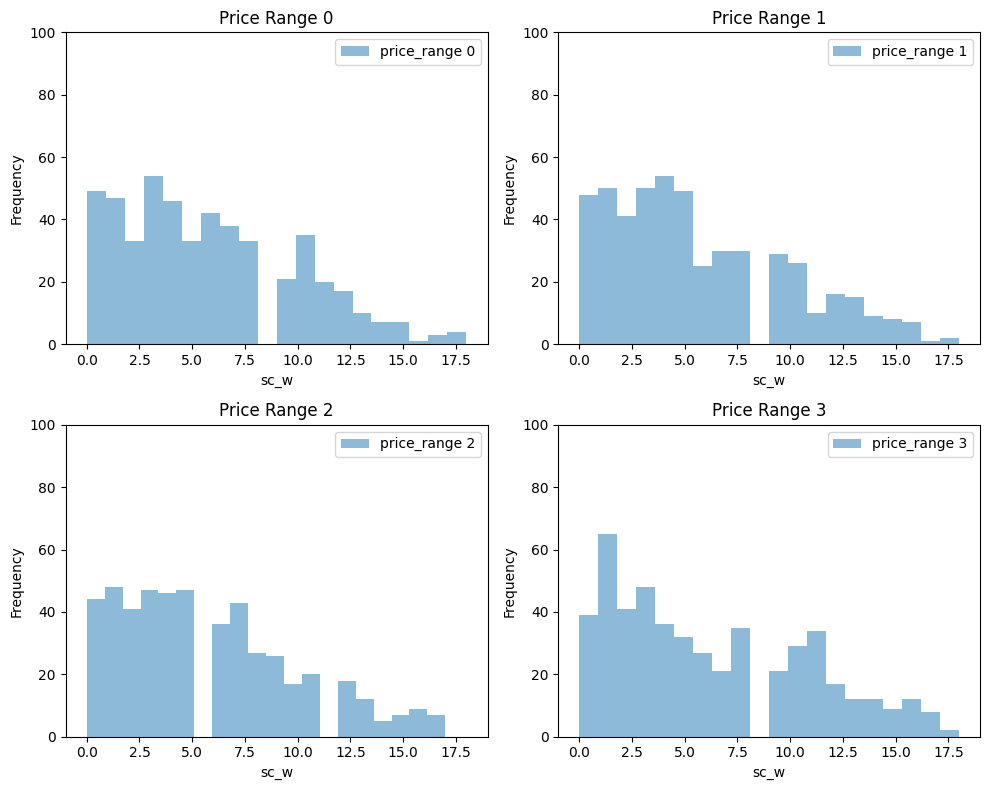

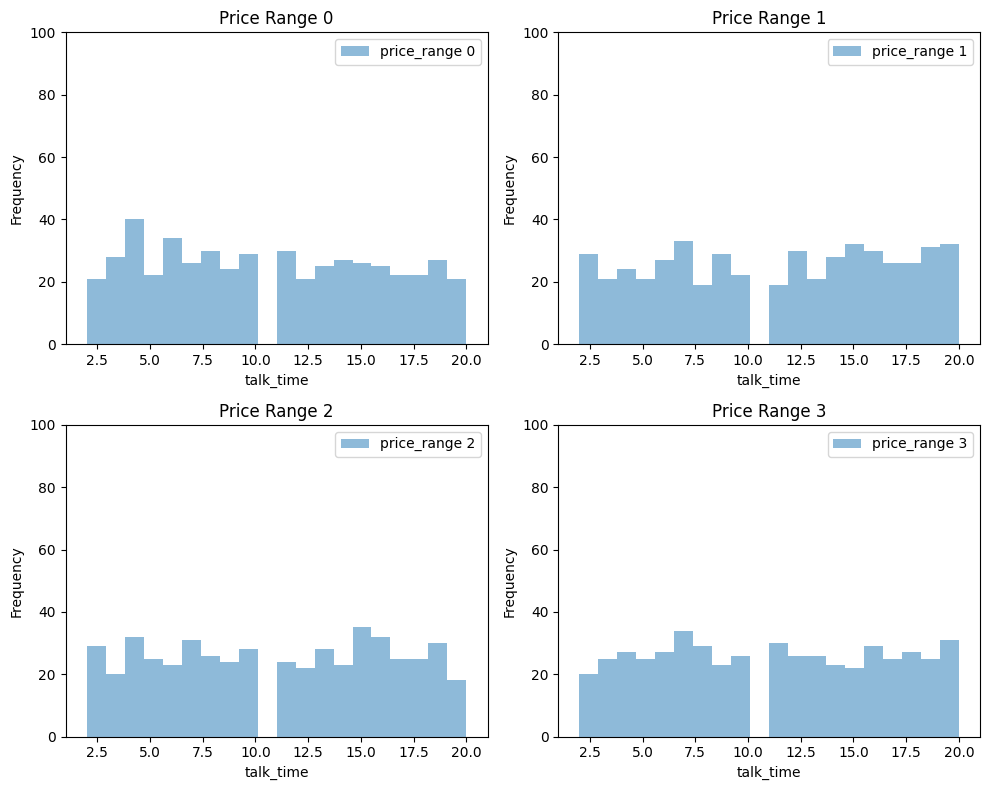

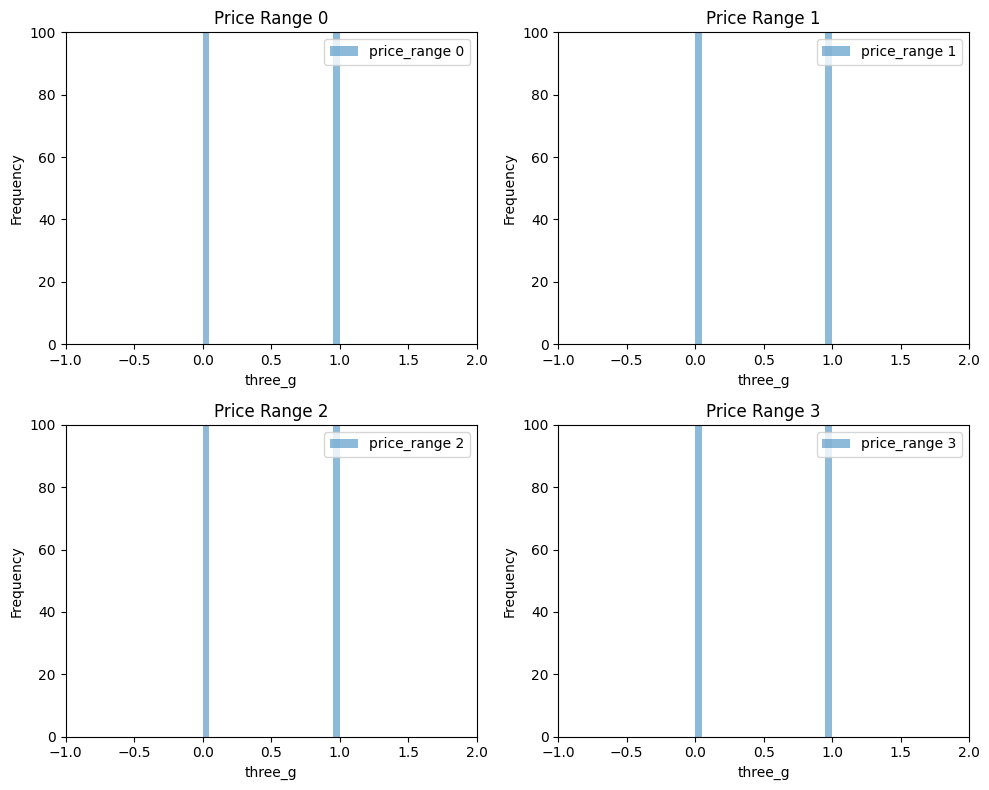

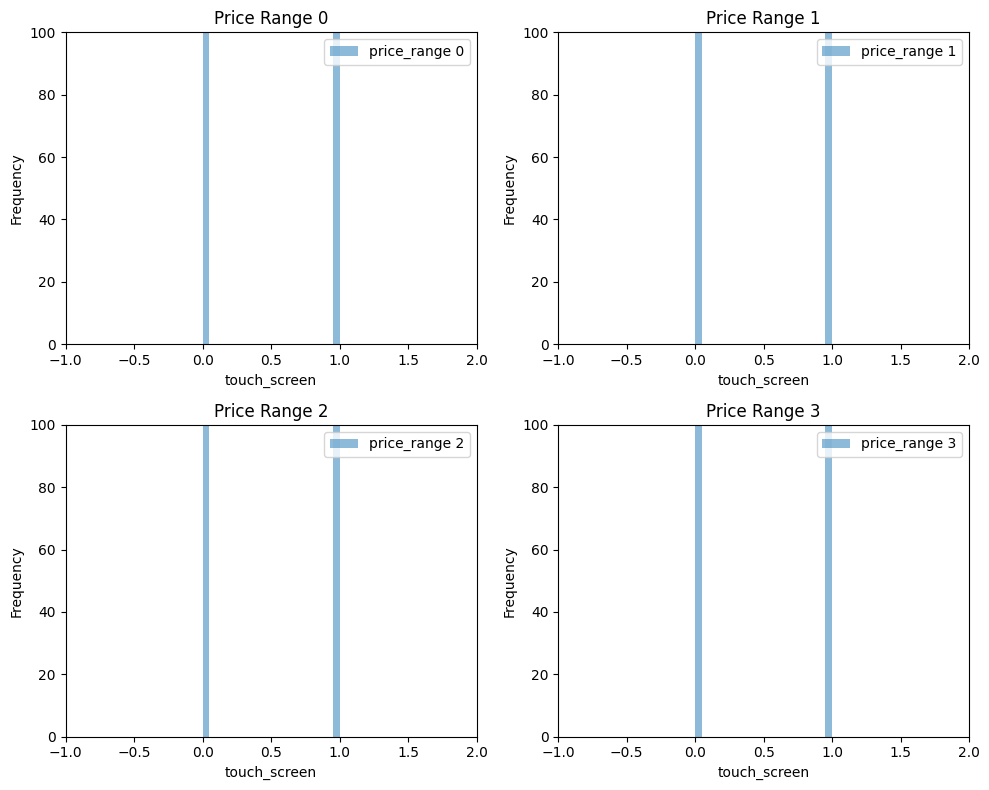

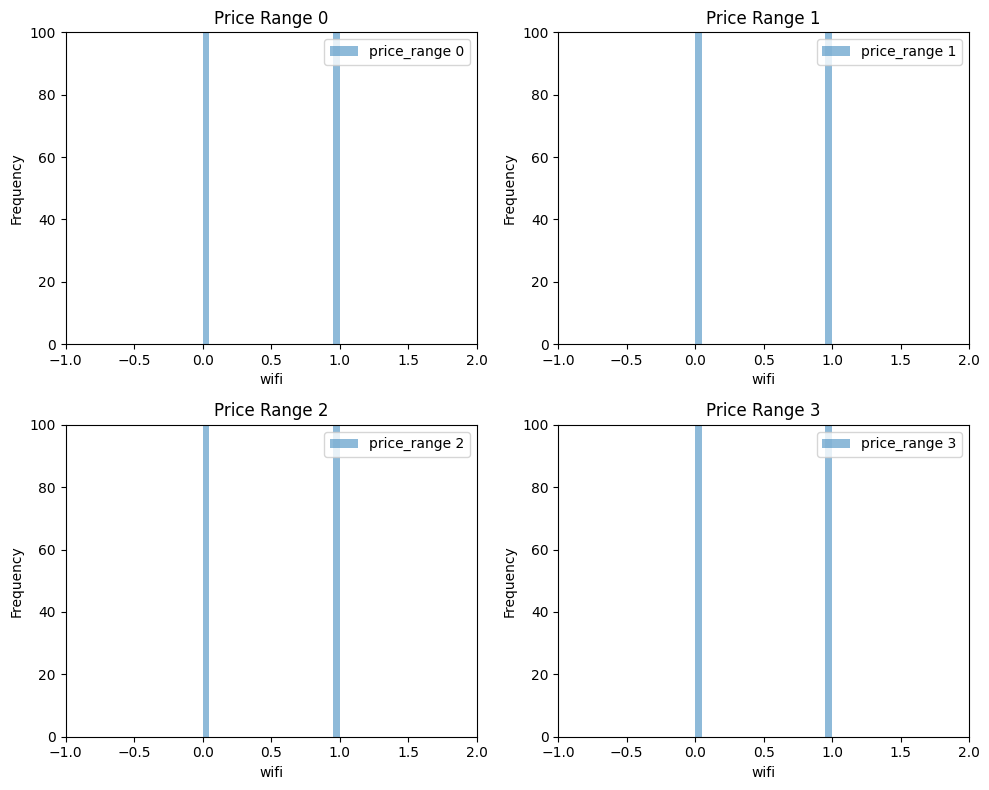

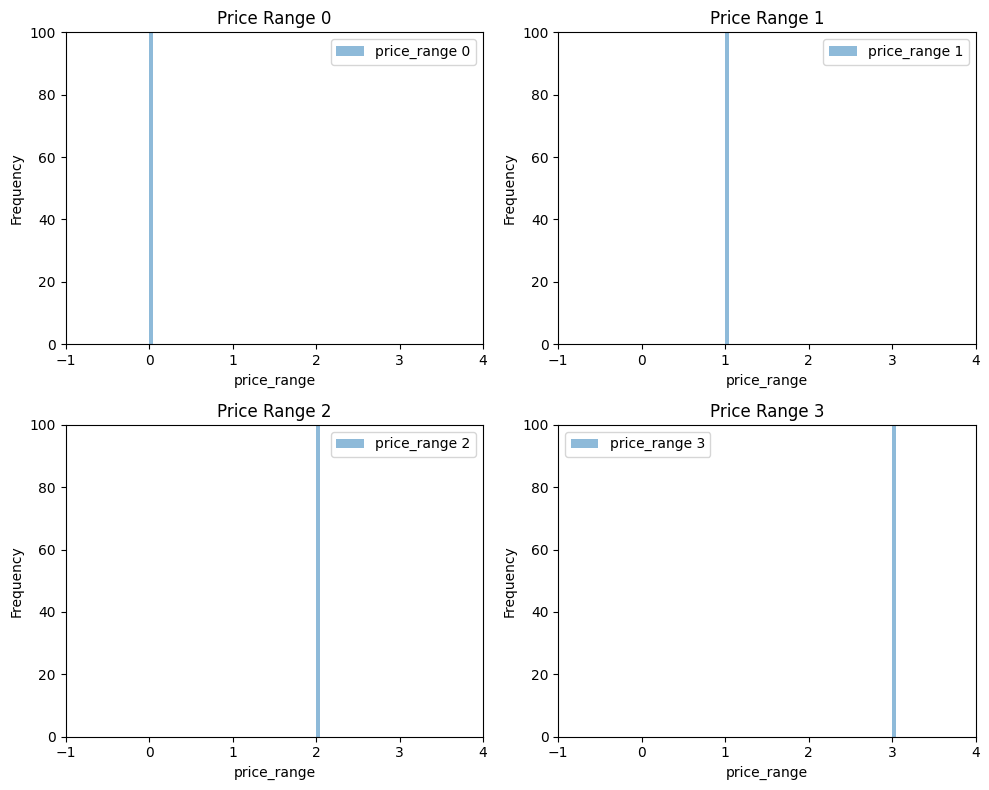

In [12]:
for j in list(data_df.columns):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    # Determine the global xlim and ylim based on data
    min_val = data_df[data_df["price_range"] == 0][j].min()
    max_val = data_df[data_df["price_range"] == 0][j].max()
    
    # Find the min and max values across all price ranges to set the same xlim/ylim
    for i in range(1, 4):
        min_val = min(min_val, data_df[data_df["price_range"] == i][j].min())
        max_val = max(max_val, data_df[data_df["price_range"] == i][j].max())
    
    # Set global xlim and ylim
    xlim = (min_val - 1, max_val + 1)
    ylim = (0, 100)  # You can adjust the upper limit based on your data, for example

    for i in range(0, 4):
        # Plot the histogram for each price range
        ax[i // 2, i % 2].hist(data_df[data_df["price_range"] == i][j], bins=20, alpha=0.5, label=f"price_range {i}")
        
        # Set titles, labels, and legends
        ax[i // 2, i % 2].set_title(f"Price Range {i}")
        ax[i // 2, i % 2].set_xlabel(j)
        ax[i // 2, i % 2].set_ylabel("Frequency")
        ax[i // 2, i % 2].legend()
        
        # Set consistent xlim and ylim
        ax[i // 2, i % 2].set_xlim(xlim)
        ax[i // 2, i % 2].set_ylim(ylim)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


In [13]:
for j in list(data_df.columns):
    print(f"Column {j} has {len(data_df[j].value_counts())} and ratio {len(data_df[j].value_counts())/len(data_df)}")
    if len(data_df[j].value_counts()) <3:
        print(data_df[j].unique())

Column battery_power has 1094 and ratio 0.547
Column blue has 2 and ratio 0.001
[0 1]
Column clock_speed has 26 and ratio 0.013
Column dual_sim has 2 and ratio 0.001
[0 1]
Column fc has 20 and ratio 0.01
Column four_g has 2 and ratio 0.001
[0 1]
Column int_memory has 63 and ratio 0.0315
Column m_dep has 10 and ratio 0.005
Column mobile_wt has 121 and ratio 0.0605
Column n_cores has 8 and ratio 0.004
Column pc has 21 and ratio 0.0105
Column px_height has 1137 and ratio 0.5685
Column px_width has 1109 and ratio 0.5545
Column ram has 1562 and ratio 0.781
Column sc_h has 15 and ratio 0.0075
Column sc_w has 19 and ratio 0.0095
Column talk_time has 19 and ratio 0.0095
Column three_g has 2 and ratio 0.001
[0 1]
Column touch_screen has 2 and ratio 0.001
[0 1]
Column wifi has 2 and ratio 0.001
[1 0]
Column price_range has 4 and ratio 0.002


In [14]:
import warnings
warnings.filterwarnings("ignore")
!pip install xgboost lightgbm catboost

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Assuming data_df is defined and available
X = data_df.drop("price_range", axis=1)
y = data_df["price_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "GaussianNB": GaussianNB(),
    "MLPClassifier": MLPClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(random_state=42),
    "LGBMClassifier": LGBMClassifier(random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
}
performance_metrics = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    
    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Calculate and print cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean()}\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    performance_metrics[model_name] = accuracy_score(y_test, y_pred)


Training RandomForestClassifier...
Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Confusion Matrix:
[[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]
Cross-validation scores: [0.890625 0.884375 0.875    0.846875 0.85625 ]
Mean CV score: 0.8706250000000001

Accuracy: 0.8925
Training LogisticRegression...
Model: LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
       

In [16]:
sorted_performance = sorted(performance_metrics.items(), key=lambda x: x[1], reverse=True)
best_model_name, best_accuracy = sorted_performance[0]
print(f"Best model: {best_model_name} with accuracy: {best_accuracy}")

Best model: LogisticRegression with accuracy: 0.975
